<a href="https://colab.research.google.com/github/bksat90/TransferLearning/blob/main/Transfer_Learning_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [2]:
# tensorflow imports
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50 as PretrainedModel
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
# load CIFAR 10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [4]:
# assert the shape of dataset
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [5]:
# change y's to categorical values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

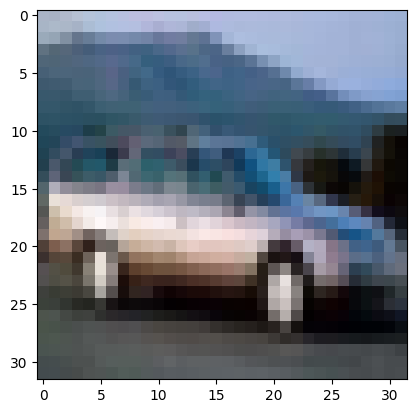

In [6]:
# display the sample image from the training data set
plt.imshow(x_train[4])
plt.show()

In [7]:
# display the sample output (classification of the class) from the
# training data set
print(y_train[4])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
# image size
IMG_SIZE = [32, 32]

In [9]:
# weights of pre trained model
ptm = PretrainedModel(
    input_shape=IMG_SIZE + [3],
    weights='imagenet',
    include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [10]:
## map the data into feature vectors

# number of classes
K = 10
x = Flatten()(ptm.output)
# softmax is used for classification
x1 = Dense(K, activation='softmax')(x)

In [11]:
# create a model
model = Model(inputs=ptm.input, outputs=x1)

In [12]:
# freeze pretrained model weights
ptm.trainable = False

In [13]:
# display the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [14]:
# create an instance of ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=2,
    horizontal_flip=True,
    zoom_range=.1,
    preprocessing_function=preprocess_input
)

In [15]:
# batch size
BATCH_SIZE = 100

In [16]:
# train data generator
train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train,
                                     y_train,
                                     batch_size=BATCH_SIZE)

In [17]:
# validation data generator
valid_datagen = ImageDataGenerator(
    rotation_range=2,
    horizontal_flip=True,
    zoom_range=.1,
    preprocessing_function=preprocess_input
)

valid_datagen.fit(x_test)
valid_generator = valid_datagen.flow(x_test,
                                     y_test,
                                     batch_size=BATCH_SIZE)

In [18]:
# callbacks setup
lrr= ReduceLROnPlateau(
    monitor='val_acc',
    factor=0.01,
    patience=3,
    min_lr=1e-5)

In [19]:
# learning rate
learn_rate=.001
adam=Adam(learning_rate=learn_rate)

In [20]:
# compile the model
model.compile(
  loss='categorical_crossentropy',
  optimizer=adam,
  metrics=['accuracy']
)

In [21]:
# fit the model
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=10,
  steps_per_epoch=(x_train.shape[0]//BATCH_SIZE),
  validation_steps=(x_test.shape[0]//BATCH_SIZE),
  callbacks=[lrr]
)

Epoch 1/10
500/500 [==============================] - ETA: 0s - loss: 1.5850 - accuracy: 0.5475

500/500 [==============================] - 57s 100ms/step - loss: 1.5850 - accuracy: 0.5475 - val_loss: 1.3089 - val_accuracy: 0.5956 - lr: 0.0010
Epoch 2/10
500/500 [==============================] - ETA: 0s - loss: 1.1830 - accuracy: 0.6198

500/500 [==============================] - 46s 92ms/step - loss: 1.1830 - accuracy: 0.6198 - val_loss: 1.2437 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 3/10
500/500 [==============================] - ETA: 0s - loss: 1.0974 - accuracy: 0.6429

500/500 [==============================] - 49s 97ms/step - loss: 1.0974 - accuracy: 0.6429 - val_loss: 1.1891 - val_accuracy: 0.6240 - lr: 0.0010
Epoch 4/10
500/500 [==============================] - ETA: 0s - loss: 1.0698 - accuracy: 0.6510

500/500 [==============================] - 45s 90ms/step - loss: 1.0698 - accuracy: 0.6510 - val_loss: 1.1791 - val_accuracy: 0.6248 - lr: 0.0010
Epoch 5/10
500/500 [==============================] - ETA: 0s - loss: 1.0611 - accuracy: 0.6537

500/500 [==============================] - 46s 91ms/step - loss: 1.0611 - accuracy: 0.6537 - val_loss: 1.1630 - val_accuracy: 0.6232 - lr: 0.0010
Epoch 6/10
500/500 [==============================] - ETA: 0s - loss: 1.0432 - accuracy: 0.6561

500/500 [==============================] - 45s 89ms/step - loss: 1.0432 - accuracy: 0.6561 - val_loss: 1.1770 - val_accuracy: 0.6293 - lr: 0.0010
Epoch 7/10
500/500 [==============================] - ETA: 0s - loss: 1.0391 - accuracy: 0.6606

500/500 [==============================] - 45s 91ms/step - loss: 1.0391 - accuracy: 0.6606 - val_loss: 1.2318 - val_accuracy: 0.6127 - lr: 0.0010
Epoch 8/10
500/500 [==============================] - ETA: 0s - loss: 1.0378 - accuracy: 0.6596

500/500 [==============================] - 48s 96ms/step - loss: 1.0378 - accuracy: 0.6596 - val_loss: 1.1824 - val_accuracy: 0.6310 - lr: 0.0010
Epoch 9/10
500/500 [==============================] - ETA: 0s - loss: 1.0377 - accuracy: 0.6623

500/500 [==============================] - 49s 97ms/step - loss: 1.0377 - accuracy: 0.6623 - val_loss: 1.1997 - val_accuracy: 0.6325 - lr: 0.0010
Epoch 10/10
500/500 [==============================] - ETA: 0s - loss: 1.0444 - accuracy: 0.6604

500/500 [==============================] - 44s 88ms/step - loss: 1.0444 - accuracy: 0.6604 - val_loss: 1.2226 - val_accuracy: 0.6264 - lr: 0.0010


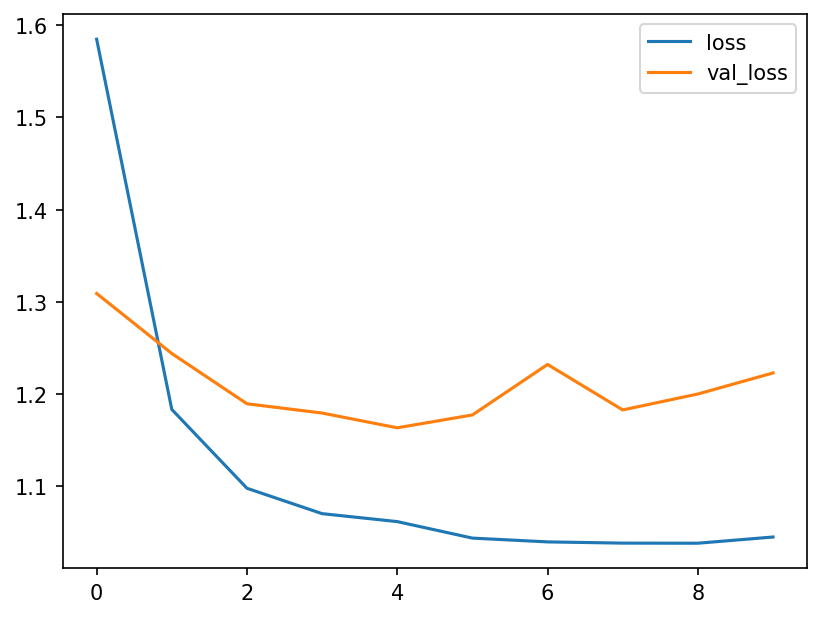

In [22]:
# plot the loss vs value loss of the model for the training data
plt.figure(dpi=150)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [23]:
y_pred = model.predict_on_batch(x_test)
y_pred_label = np.argmax(y_pred, axis=1)

In [24]:
y_pred_label[0:10]

array([8, 8, 4, 8, 0, 4, 2, 2, 3, 3])

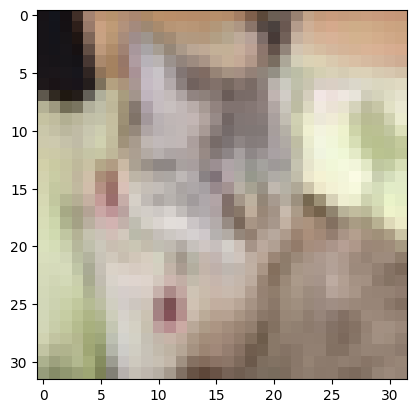

In [25]:
# display the sample image from the test data set
plt.imshow(x_test[8])
plt.show()

In [28]:
# displaying the predicted y value for the test image
y_pred_label[8]

3